In [13]:
import numpy as np
import matplotlib.pyplot as plt


# x = np.array(['x1', 'x2'])

def f(x):
    x1 = x[0]
    x2 = x[1]

    return 10 * (x1 - 1) ** 2 + (x2 + 1) ** 2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]

    return np.array([20 * (x1 - 1), 2*(x2+1)])

In [75]:
def GD(f, grad_f, x0, alpha, maxit=1000, tolf=1e-6, tolx=1e-6):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))

    # set the values for infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))
    xk = x0
    for k in range(maxit):
        x = xk - alpha * grad_f(xk)

        # Update the infos
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        if grad_norm[k+1] <= tolf * grad_norm[0] or np.linalg.norm(x - xk) <= tolx:
            break
        xk = x
    
    # cut off exceeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

In [76]:
x0 = np.zeros((2,))
alpha = 0.01

x_true = np.array([1, -1])
print(f'The true solution is {x_true}')

x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha)
print(f'The computed solution is {x_sol} with k = {k}')

x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)
print(f'The computed solution is {x_sol2} with k = {k2}')


The true solution is [ 1 -1]
The computed solution is [ 1.         -0.99995178] with k = 491
The computed solution is [ 1.         -0.99999074] with k = 109


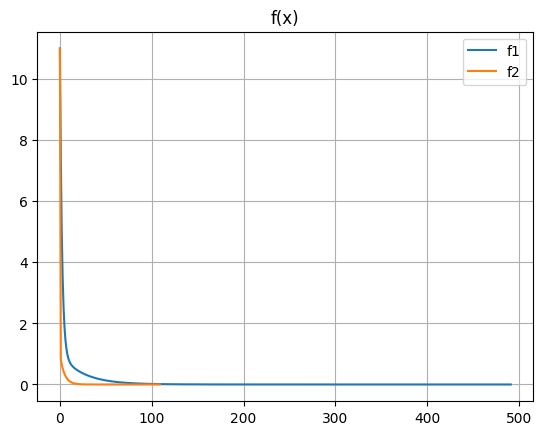

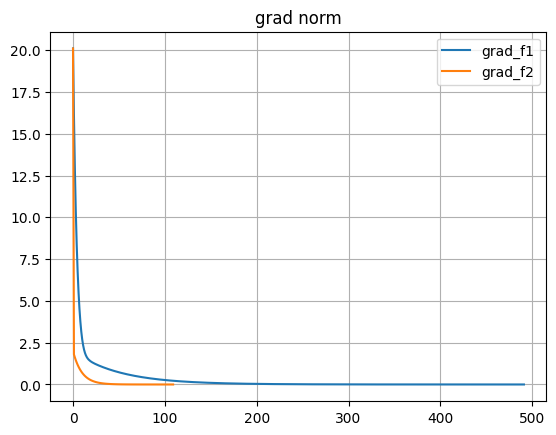

In [77]:
# plot f_val and grad_norm

plt.plot(f_val)
plt.plot(f_val2)
plt.title("f(x)")
plt.legend(['f1', 'f2'])
plt.grid()
plt.show()

plt.plot(grad_norm)
plt.plot(grad_norm2)
plt.title("grad norm")
plt.legend(['grad_f1', 'grad_f2'])
plt.grid()
plt.show()

In [70]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

In [78]:
def GD_backtracking(f, grad_f, x0, maxit=1000, tolf=1e-6, tolx=1e-6):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))

    # set the values for infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))
    xk = x0
    for k in range(maxit):
        alpha = backtracking(f, grad_f, xk)
        x = xk - alpha * grad_f(xk)

        # Update the infos
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        if grad_norm[k+1] <= tolf * grad_norm[0] or np.linalg.norm(x - xk) <= tolx:
            break
        xk = x
    
    # cut off exceeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

The computed solution is [ 1.         -0.99999116] with k = 93


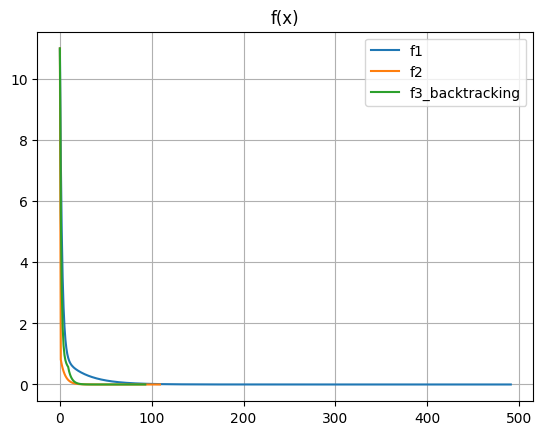

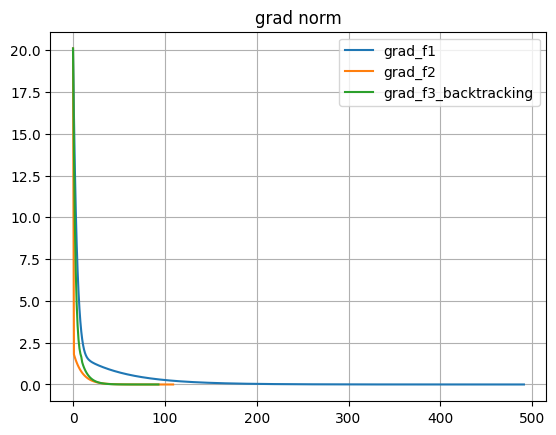

In [80]:
x_sol3, k3, f_val3, grad_norm3 = GD_backtracking(f, grad_f, x0)
print(f'The computed solution is {x_sol3} with k = {k3}')

# plot f_val and grad_norm

plt.plot(f_val)
plt.plot(f_val2)
plt.plot(f_val3)
plt.title("f(x)")
plt.legend(['f1', 'f2', 'f3_backtracking'])
plt.grid()
plt.show()

plt.plot(grad_norm)
plt.plot(grad_norm2)
plt.plot(grad_norm3)
plt.title("grad norm")
plt.legend(['grad_f1', 'grad_f2', 'grad_f3_backtracking'])
plt.grid()
plt.show()